## load packages and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as pl
import scanpy as sc
from anndata import AnnData
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
file_path = "/home/nas2/biod/yangchenghui/my_ych_project_BMMC/BMMC_in_scVI_GLUE/"

In [3]:
RNA_raw_data = pd.read_table(file_path+'BMMC_raw_count/BMMC_RNA_raw_counts.txt', sep='\t', index_col=0)
ATAC_raw_data = pd.read_table(file_path+'BMMC_agg_count/BMMC_agg_ATAC_k5_full.txt', sep='\t', index_col=0)

In [4]:
activity_raw_data = pd.read_table(file_path+'BMMC_agg_count/BMMC_agg_ATAC_gene_activity_k5_full.txt', sep='\t', index_col=0)
activity_raw_data

,Agg_atac_1,Agg_atac_2,Agg_atac_3,Agg_atac_4,Agg_atac_5,Agg_atac_6,Agg_atac_7,Agg_atac_8,Agg_atac_9,Agg_atac_10,...,Agg_atac_1593,Agg_atac_1594,Agg_atac_1595,Agg_atac_1596,Agg_atac_1597,Agg_atac_1598,Agg_atac_1599,Agg_atac_1600,Agg_atac_1601,Agg_atac_1602
PLCXD1,0,0,1,1,1,1,0,1,0,2,...,3,3,2,3,3,0,2,2,2,0
GTPBP6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PPP2R3B,0,0,1,0,1,1,1,0,0,3,...,0,1,2,1,1,3,2,2,3,3
SHOX,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CRLF2,0,0,0,0,0,0,0,0,0,2,...,1,1,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C21orf58,1,3,2,2,0,0,3,0,1,5,...,0,1,3,1,2,2,1,2,2,2
PCNT,2,4,3,2,1,0,3,1,2,5,...,0,1,3,1,3,3,1,3,3,3
DIP2A,1,3,2,1,2,3,0,2,1,6,...,3,2,1,2,1,1,2,1,3,1
S100B,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


In [5]:
RNA_raw_data

,AAACCTGAGCTTTGGT.1,AAACCTGCACAGGCCT.1,AAACCTGCATGCCTTC.1,AAACCTGGTGTGTGCC.1,AAACCTGTCCGTCATC.1,AAACGGGAGCTCCTCT.1,AAACGGGCACAAGTAA.1,AAACGGGCACATCCGG.1,AAACGGGCAGTGGGAT.1,AAACGGGGTAGGACAC.1,...,TTTGGTTAGGCCCGTT.1,TTTGGTTGTCAGTGGA.1,TTTGGTTGTGCCTGCA.1,TTTGGTTGTGTCTGAT.1,TTTGTCAAGAGTAAGG.1,TTTGTCAAGCCCAATT.1,TTTGTCAAGTCACGCC.1,TTTGTCACACATCCAA.1,TTTGTCACAGGTCTCG.1,TTTGTCATCGTAGGAG.1
AL627309.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AL669831.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LINC00115,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FAM41C,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NOC2L,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC011043.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AL592183.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AC007325.4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AC004556.1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [ ]:
ATAC_raw_data

,Agg_atac_1,Agg_atac_2,Agg_atac_3,Agg_atac_4,Agg_atac_5,Agg_atac_6,Agg_atac_7,Agg_atac_8,Agg_atac_9,Agg_atac_10,...,Agg_atac_1593,Agg_atac_1594,Agg_atac_1595,Agg_atac_1596,Agg_atac_1597,Agg_atac_1598,Agg_atac_1599,Agg_atac_1600,Agg_atac_1601,Agg_atac_1602
chr1-565160-565494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,1
chr1-569185-569620,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr1-713582-714671,0,1,1,1,1,1,1,1,0,1,...,0,1,2,3,2,1,1,2,1,1
chr1-752510-752903,0,0,0,0,0,0,0,0,0,0,...,2,2,1,0,0,1,0,1,0,1
chr1-762417-763297,1,1,1,1,1,0,0,0,1,1,...,0,0,1,0,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrY-59019139-59019141,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chrY-59019725-59020300,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,1
chrY-59025957-59026013,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chrY-59030133-59030273,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
RNA_celltype = pd.read_csv(file_path+'BMMC_raw_count/BMMC_RNA_celltype.txt', sep='\t', index_col=0)
RNA_celltype

,label
cell,
AAACCTGAGCTTTGGT-1,CD4
AAACCTGCACAGGCCT-1,CD4
AAACCTGCATGCCTTC-1,CD4
AAACCTGGTGTGTGCC-1,CD4
AAACCTGTCCGTCATC-1,CD4
...,...
TTTGTCAAGCCCAATT-1,CD4
TTTGTCAAGTCACGCC-1,CD4
TTTGTCACACATCCAA-1,CD4


In [6]:
ATAC_celltype = pd.read_csv(file_path+'BMMC_agg_count/BMMC_agg_k5_atac_label.txt', sep='\t', index_col=0)
ATAC_celltype

,metas
Agg_atac_1,Ery
Agg_atac_2,CD4
Agg_atac_3,CD4
Agg_atac_4,CD4
Agg_atac_5,CD4
...,...
Agg_atac_1598,B
Agg_atac_1599,B
Agg_atac_1600,B
Agg_atac_1601,B


In [7]:
X1 = ATAC_raw_data.T
X2 = RNA_raw_data.T
(n1, d1) = X1.shape
(n2, d2) = X2.shape
print("Dimensions of input datasets are: ", "X1 = ", X1.shape, " X2 = ", X2.shape)
basic_labels1 = np.array(ATAC_celltype['metas'])
basic_labels2 = np.array(RNA_celltype['label'])
print("Dimensions of basic_labels are: ", "basic_labels1 = ", basic_labels1.shape, " basic_labels2 = ", basic_labels2.shape)
cell_names1 = list(ATAC_raw_data.columns)
cell_names2 = list(RNA_raw_data.columns)
peak_names = list(ATAC_raw_data.index)
gene_names = list(RNA_raw_data.index)

Dimensions of input datasets are:  X1 =  (1602, 67487)  X2 =  (2379, 15399)
Dimensions of basic_labels are:  basic_labels1 =  (1602,)  basic_labels2 =  (2379,)


In [10]:
# # FGOT中使用的数据，正则化过，特征筛选过
# data_path = "/home/nas2/biod/yangchenghui/FGOT-master/data/BMMC_data/"
# RNA_data = pd.read_csv(data_path+'RNA_normalized.txt', sep='\t', index_col=0)
# ATAC_data = pd.read_csv(data_path+'ATAC_normalized.txt', sep='\t', index_col=0)

# scVI

In [8]:
import os
import tempfile

import scanpy as sc
import scvi
import seaborn as sns
import torch
from rich import print

/home/yangchenghui/anaconda3/envs/scvi-env/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/yangchenghui/anaconda3/envs/scvi-env/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/yangchenghui/anaconda3/envs/scvi-env/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/home/yangchenghui/anaconda3/envs/scvi-env/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing CSCDataset from `anndata.experimental` is deprecated. Import anndata.abc.CSCDataset instead.
  warnings.warn(msg, FutureWarning)
/home/yangchenghui/anaconda3/envs/scvi-env/lib/python3.12/

In [12]:
scvi.settings.seed = 0
print("Last run with scvi-tools version:", scvi.__version__)

Seed set to 0


Last run with scvi-tools version: 1.2.1

In [13]:
sc.set_figure_params(figsize=(6, 6), frameon=False)
sns.set_theme()
torch.set_float32_matmul_precision("high")
save_dir = tempfile.TemporaryDirectory()

%config InlineBackend.print_figure_kwargs={"facecolor": "w"}
%config InlineBackend.figure_format="retina"

In [36]:
import anndata

common_genes = RNA_raw_data.index.intersection(activity_raw_data.index)
RNA_common = RNA_raw_data.loc[common_genes]
activity_common = activity_raw_data.loc[common_genes]
RNA_obs = pd.DataFrame({"batch": "RNA", "cell_label": basic_labels2}, index=RNA_common.columns)
activity_obs = pd.DataFrame({"batch": "Activity", "cell_label": basic_labels1}, index=activity_common.columns)

RNA_adata = anndata.AnnData(X=RNA_common.T, obs=RNA_obs, var=pd.DataFrame(index=common_genes))
activity_adata = anndata.AnnData(X=activity_common.T, obs=activity_obs, var=pd.DataFrame(index=common_genes))
sc.pp.normalize_total(RNA_adata)
sc.pp.log1p(RNA_adata)
sc.pp.normalize_total(activity_adata)
sc.pp.log1p(activity_adata)
    
adata  = anndata.concat([RNA_adata, activity_adata])
adata.layers["counts"] = adata.X.copy()
adata 

AnnData object with n_obs × n_vars = 3981 × 12429
    obs: 'batch', 'cell_label'
    layers: 'counts'

In [37]:
adata.raw = adata  # keep full dimension safe
sc.pp.highly_variable_genes(
    adata,
    flavor="seurat_v3",
    n_top_genes=5000,
    layer="counts",
    batch_key="batch",
    subset=True,
)

/home/yangchenghui/anaconda3/envs/scvi-env/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:75: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


In [38]:
scvi.model.SCVI.setup_anndata(adata, layer="counts", batch_key="batch")

/home/yangchenghui/anaconda3/envs/scvi-env/lib/python3.12/site-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.layers[counts] does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)


In [39]:
model = scvi.model.SCVI(adata, n_layers=2, n_latent=30, gene_likelihood="nb")

In [40]:
model.train(max_epochs=1000)

Trainer will use only 1 of 10 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=10)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7,8,9]
/home/yangchenghui/anaconda3/envs/scvi-env/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=103` in the `DataLoader` to improve performance.


Training:   0%|          | 0/1000 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=1000` reached.


In [41]:
SCVI_LATENT_KEY = "X_scVI"
adata.obsm[SCVI_LATENT_KEY] = model.get_latent_representation()

In [42]:
sc.pp.neighbors(adata, use_rep=SCVI_LATENT_KEY)
# sc.tl.leiden(adata)

In [43]:
SCVI_MDE_KEY = "X_scVI_MDE"
adata.obsm[SCVI_MDE_KEY] = scvi.model.utils.mde(adata.obsm[SCVI_LATENT_KEY])

Trainer will use only 1 of 10 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=10)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.


INFO     Using cuda:0 for `pymde.preserve_neighbors`.                                                              
Dec 24 07:56:02 PM: Your dataset appears to contain duplicated items (rows); when embedding, you should typically have unique items.
Dec 24 07:56:02 PM: The following items have duplicates [2700 2832 3695 3827 3880 3980]


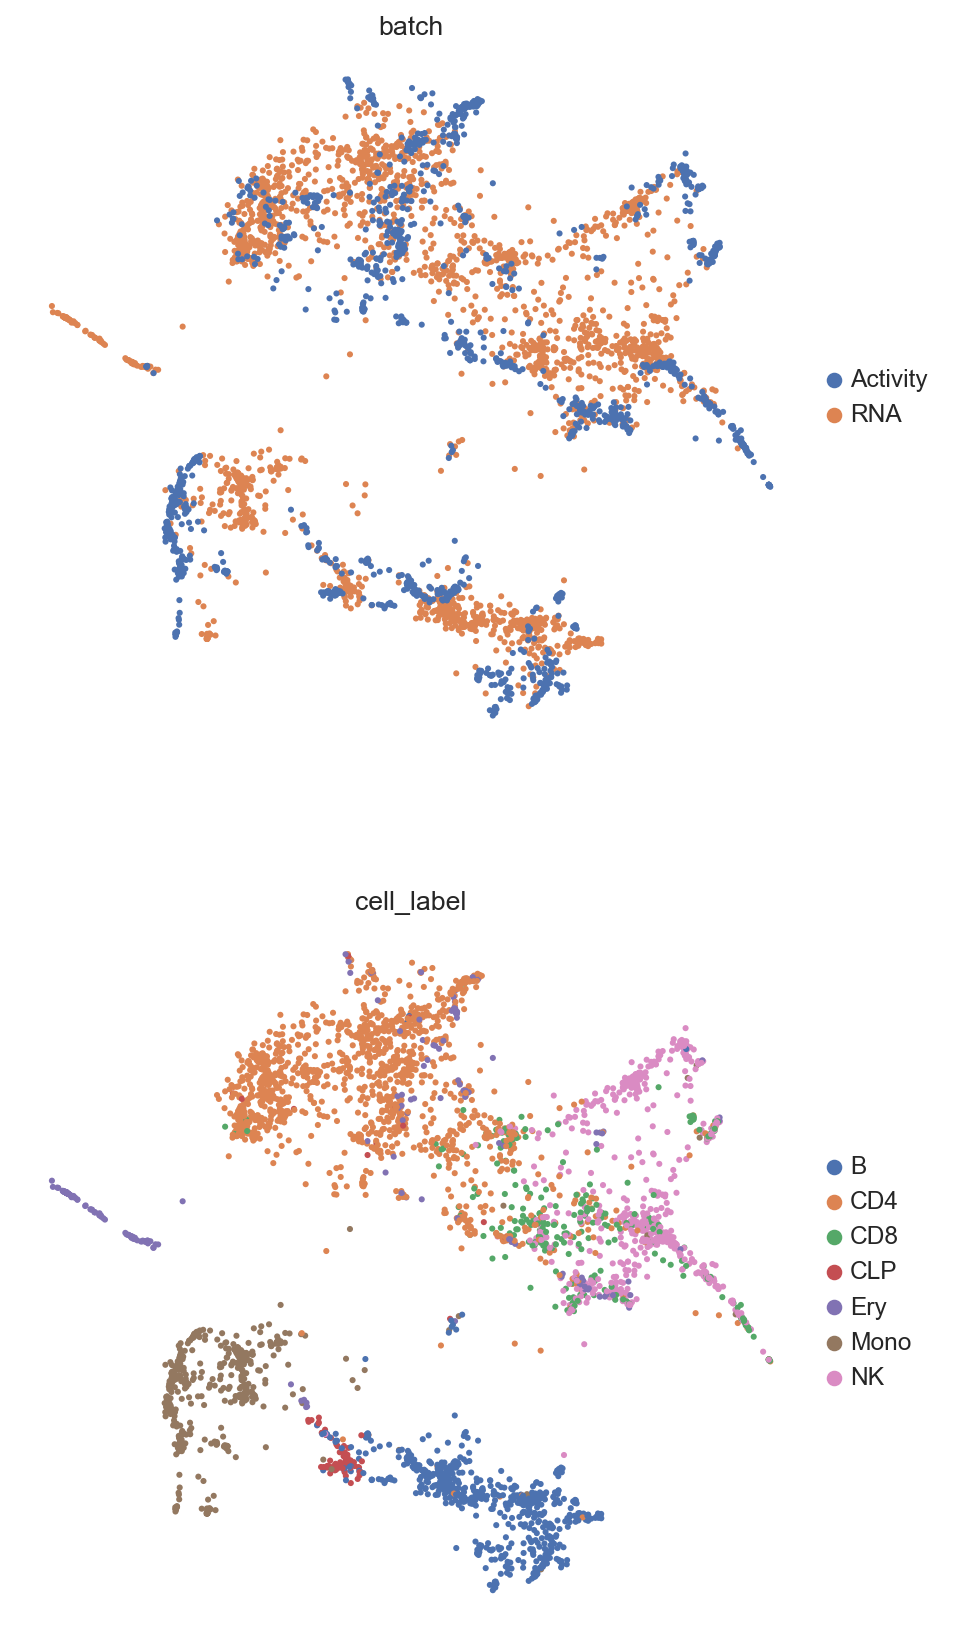

In [44]:
sc.pl.embedding(
    adata,
    basis=SCVI_MDE_KEY,
    color=["batch", "cell_label"],
    frameon=False,
    ncols=1,
)

In [45]:
adata.write_h5ad(file_path+"scVI_result/aggBMMC_scVI_adata.h5ad")

In [3]:
import anndata
adata = anndata.read(file_path+"scVI_result/aggBMMC_scVI_adata.h5ad")
adata

/home/yangchenghui/anaconda3/envs/scvi-env/lib/python3.12/site-packages/anndata/__init__.py:52: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 3981 × 5000
    obs: 'batch', 'cell_label', '_scvi_batch', '_scvi_labels'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'batch_colors', 'cell_label_colors', 'hvg', 'neighbors'
    obsm: 'X_scVI', 'X_scVI_MDE'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

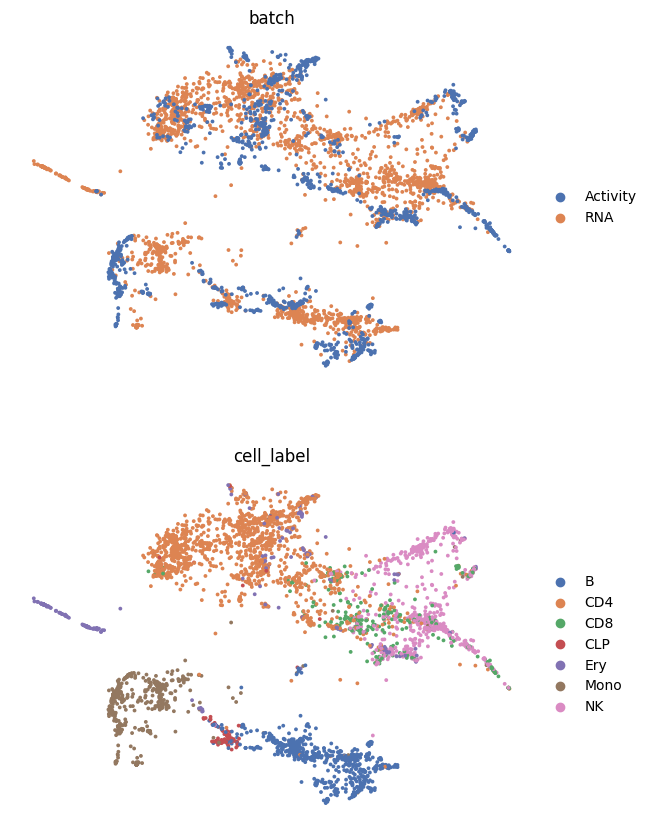

In [7]:
sc.pl.embedding(
    adata,
    basis='X_scVI_MDE',
    color=["batch", "cell_label"],
    frameon=False,
    ncols=1,show=False
)
pl.savefig(file_path + "pdf/aggBMMC_scVI_embedding.pdf")

In [46]:
import anndata
adata = anndata.read(file_path+"scVI_result/aggBMMC_scVI_adata.h5ad")
adata

/home/yangchenghui/anaconda3/envs/scvi-env/lib/python3.12/site-packages/anndata/__init__.py:52: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 3981 × 5000
    obs: 'batch', 'cell_label', '_scvi_batch', '_scvi_labels'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'batch_colors', 'cell_label_colors', 'hvg', 'neighbors'
    obsm: 'X_scVI', 'X_scVI_MDE'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [47]:
adata

AnnData object with n_obs × n_vars = 3981 × 5000
    obs: 'batch', 'cell_label', '_scvi_batch', '_scvi_labels'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'batch_colors', 'cell_label_colors', 'hvg', 'neighbors'
    obsm: 'X_scVI', 'X_scVI_MDE'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [48]:
rna_emd = adata[adata.obs["batch"] == "RNA"].obsm['X_scVI']
atac_emd = adata[adata.obs["batch"] == "Activity"].obsm['X_scVI']
atac_emd.shape, rna_emd.shape

((1602, 30), (2379, 30))

计算MNN相似度

In [49]:
import sys
sys.path.insert(1, '/home/nas2/biod/yangchenghui/FGOT-master')
from FGOT import preprocess as pre

In [58]:
S_m = pre.calculate_cell_similarity_byMNN(atac_emd, rna_emd, cell_names1, cell_names2, scale=0, knn = 100)
r = pre.check_mnn_accuracy(S_m, basic_labels1, basic_labels2)
print("The accuracy of identifying MNN pairs is:", r)

the number of MNN pairs is  80934


The accuracy of identifying MNN pairs is: 0.7103007506767889

In [59]:
rows_all_zero = np.all(S_m == 0, axis=1)

# 打印结果
print("是否有全零行:", np.any(rows_all_zero))  # 是否存在全零行
print("全零行的索引:", np.where(rows_all_zero)[0])  # 全零行的索引

是否有全零行: True

全零行的索引: [   5    7   20   31   61   67  114  127  133  162  187  196  206  242
  258  265  274  282  326  328  330  343  345  352  358  361  362  393
  394  400  403  405  409  419  421  424  438  444  446  453  462  473
  477  493  546  547  557  599  610  627  638  652  661  663  674  677
  695  702  703  707  729  734  736  739  746  751  768  771  775  778
  781  783  790  798  802  823  826  828  830  840  841  852  858  867
  870  875  878  887  895  898  900  903  907  918 1390 1448 1483 1486
 1487 1495 1496 1501 1511 1512 1567 1568]

Text(0.5, 1.0, 'S_MNN')

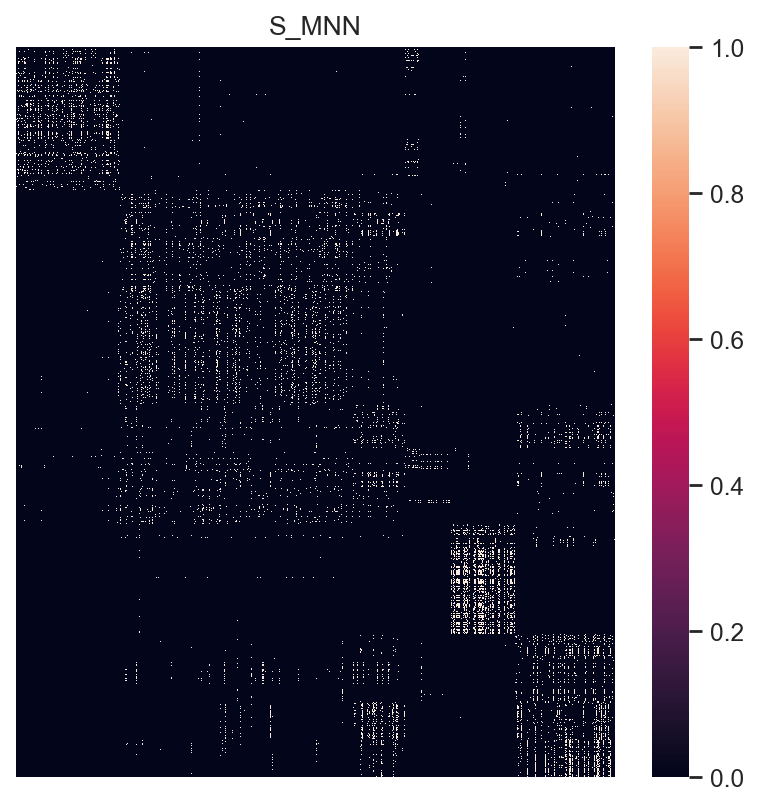

In [60]:
sorted_cols = np.argsort(basic_labels1)
sorted_S = S_m.iloc[sorted_cols,: ]
sorted_rows = np.argsort(basic_labels2)
sorted_S = sorted_S.iloc[:, sorted_rows]
sns.heatmap(sorted_S, xticklabels=False, yticklabels=False)
pl.title('S_MNN')

In [61]:
# import snn
s_tmp = adata.obsp['connectivities'].toarray()
np.fill_diagonal(s_tmp, 1)
snn1 = s_tmp[2379:,2379:]
snn2 = s_tmp[:2379,:2379]

In [62]:
S_sm = pre.smooth_cell_similarity_byLaplacian2(S_m,snn1,snn2)
S = S_sm/np.max(S_sm) + S_m/np.max(S_m)

Text(0.5, 1.0, 'S after smooth')

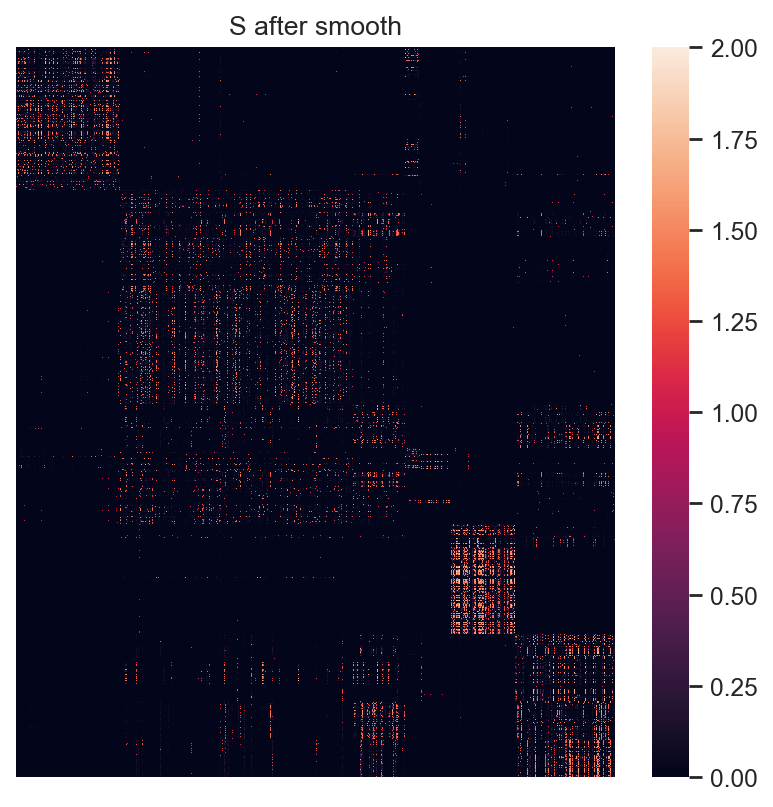

In [63]:
sorted_cols = np.argsort(basic_labels1)
sorted_S = S.iloc[sorted_cols,: ]
sorted_rows = np.argsort(basic_labels2)
sorted_S = sorted_S.iloc[:, sorted_rows]
sns.heatmap(sorted_S, xticklabels=False, yticklabels=False)
pl.title('S after smooth')

In [64]:
# compute cost
cost = np.array(np.exp(np.max(S) - S))
cost = cost - np.min(cost)
cost = pd.DataFrame(cost, index = cell_names1, columns=cell_names2)

Text(0.5, 1.0, 'cost across modality')

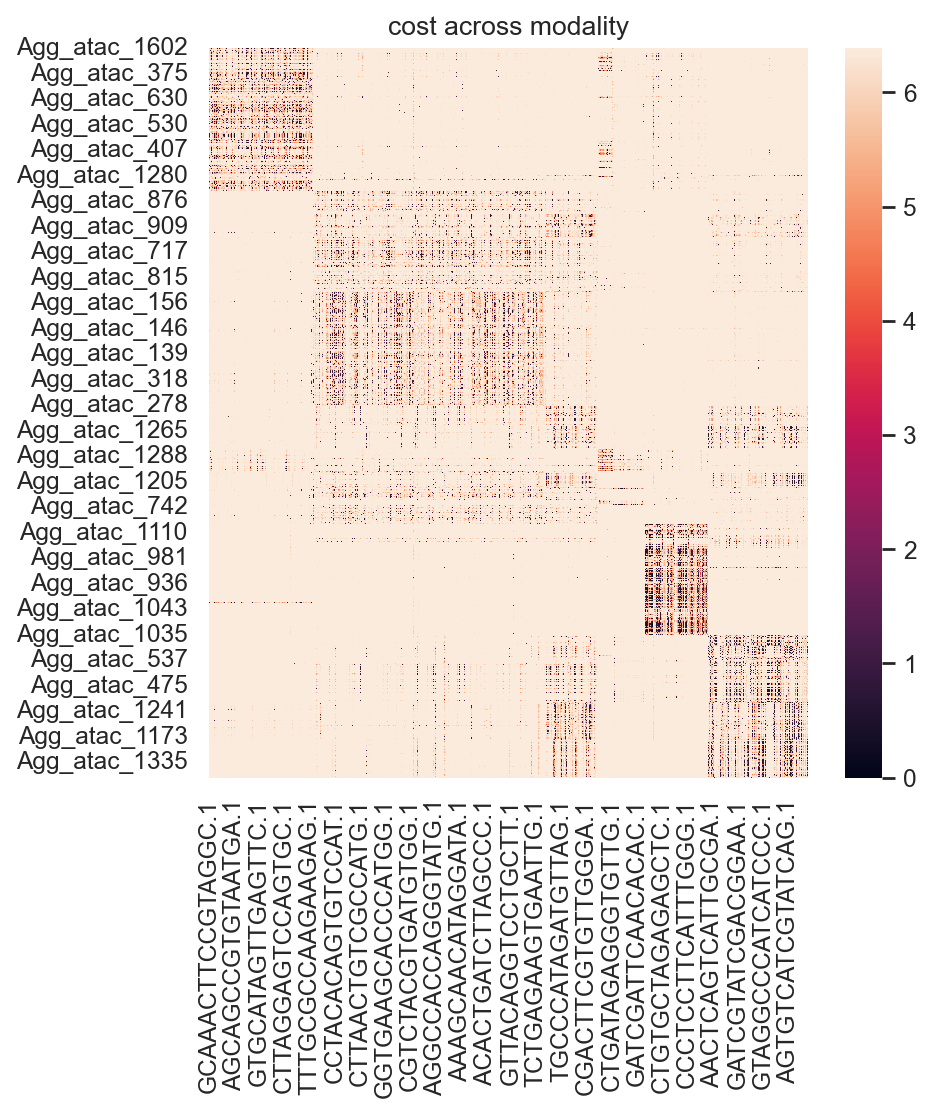

In [65]:
sorted_cols = np.argsort(basic_labels1)
sorted_cost = cost.iloc[sorted_cols,: ]
sorted_rows = np.argsort(basic_labels2)
sorted_cost = sorted_cost.iloc[:, sorted_rows]
sns.heatmap(sorted_cost)
pl.title('cost across modality')

# GLUE

In [10]:
import anndata as ad
import networkx as nx
import scanpy as sc
import scglue
from matplotlib import rcParams

/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/ignite/handlers/checkpoint.py:16: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import ZeroRedundancyOptimizer


In [11]:
scglue.plot.set_publication_params()
rcParams["figure.figsize"] = (4, 4)

In [12]:
atac = AnnData(ATAC_raw_data.T)
atac.obs["cell_type"] = basic_labels1
atac.obs["domain"] = "scATAC-seq"
rna = AnnData(RNA_raw_data.T)
rna.obs["cell_type"] = basic_labels2
rna.obs["domain"] = "scRNA-seq"
atac, rna

(AnnData object with n_obs × n_vars = 1602 × 67487
     obs: 'cell_type', 'domain',
 AnnData object with n_obs × n_vars = 2379 × 15399
     obs: 'cell_type', 'domain')

In [13]:
np.unique(atac.X[atac.X != 0])

array([1, 2, 3, 4, 5])

In [14]:
np.unique(rna.X[rna.X != 0])

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
         34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
         45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
         56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
         67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
         78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
         89,   90,   91,   92,   93,   94,   95,   96,   97,   98,   99,
        100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
        111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
        122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
        133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
        144,  145,  146,  147,  148,  149,  150,  1

Preprocess scRNA-seq data

In [15]:
rna.layers["counts"] = rna.X.copy()

In [16]:
sc.pp.highly_variable_genes(rna, n_top_genes=2000, flavor="seurat_v3")

In [17]:
sc.pp.normalize_total(rna)
sc.pp.log1p(rna)
sc.pp.scale(rna)
sc.tl.pca(rna, n_comps=100, svd_solver="auto")

/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


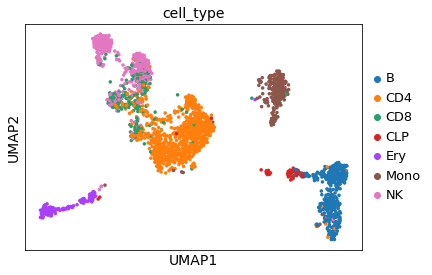

In [18]:
sc.pp.neighbors(rna, metric="cosine")
sc.tl.umap(rna)
sc.pl.umap(rna, color="cell_type")

Preprocess scATAC-seq data

In [19]:
atac.X, atac.X.data, atac.X.shape

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        ...,
        [0, 0, 2, ..., 0, 0, 0],
        [1, 0, 1, ..., 0, 0, 0],
        [1, 0, 1, ..., 0, 0, 0]]),
 (1602, 67487))

In [20]:
zero_cols = np.where(atac.X.sum(axis=0) != 0)[0]
atac = atac[:, zero_cols]
atac

View of AnnData object with n_obs × n_vars = 1602 × 66573
    obs: 'cell_type', 'domain'

In [21]:
scglue.data.lsi(atac, n_components=100, n_iter=15)

In [22]:
sc.pp.neighbors(atac, use_rep="X_lsi", metric="cosine")
sc.tl.umap(atac)

/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


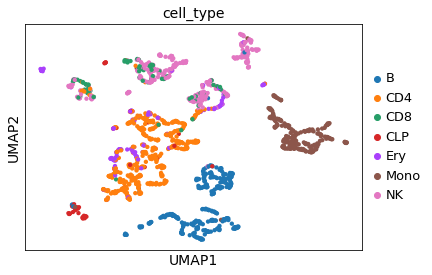

In [23]:
sc.pl.umap(atac, color="cell_type")

Construct prior regulatory graph

In [24]:
scglue.data.get_gene_annotation(
    rna, 
    gtf= file_path+"GLUE_result/gencode.v40lift37.annotation.gtf.gz",
    gtf_by="gene_name"
)
df_new = rna.var.loc[:, ["chrom", "chromStart", "chromEnd"]]

# 计算所有列都非 NaN 的行数
non_nan_row_count = df_new.dropna().shape[0]
print(f"Number of rows without NaN: {non_nan_row_count}")

Number of rows without NaN: 13610


In [25]:
genes_selected = rna.var.loc[:, ["chrom", "chromStart", "chromEnd"]].dropna().index
rna = rna[:, genes_selected]
rna

View of AnnData object with n_obs × n_vars = 2379 × 13610
    obs: 'cell_type', 'domain'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std', 'chrom', 'chromStart', 'chromEnd', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts', 'gene_id', 'gene_type', 'hgnc_id', 'havana_gene', 'remap_status', 'remap_target_status', 'tag', 'gene_status', 'remap_substituted_missing_target'
    uns: 'hvg', 'log1p', 'pca', 'neighbors', 'umap', 'cell_type_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [26]:
rna.var.loc[:, ["chrom", "chromStart", "chromEnd"]]

,chrom,chromStart,chromEnd
AL627309.1,chr1,134900.0,139379.0
LINC00115,chr1,761585.0,762902.0
FAM41C,chr1,803450.0,812283.0
NOC2L,chr1,879582.0,894689.0
KLHL17,chr1,895963.0,901099.0
...,...,...,...
MT-ND4L,chrM,10469.0,10766.0
MT-ND4,chrM,10759.0,12137.0
MT-ND5,chrM,12336.0,14148.0
MT-ND6,chrM,14148.0,14673.0


In [27]:
genes_selected = rna.var[rna.var["chrom"] != "chrM"].index
rna = rna[:, genes_selected]
rna

View of AnnData object with n_obs × n_vars = 2379 × 13597
    obs: 'cell_type', 'domain'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std', 'chrom', 'chromStart', 'chromEnd', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts', 'gene_id', 'gene_type', 'hgnc_id', 'havana_gene', 'remap_status', 'remap_target_status', 'tag', 'gene_status', 'remap_substituted_missing_target'
    uns: 'hvg', 'log1p', 'pca', 'neighbors', 'umap', 'cell_type_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [28]:
rna.var.loc[:, ["chrom", "chromStart", "chromEnd"]]

,chrom,chromStart,chromEnd
AL627309.1,chr1,134900.0,139379.0
LINC00115,chr1,761585.0,762902.0
FAM41C,chr1,803450.0,812283.0
NOC2L,chr1,879582.0,894689.0
KLHL17,chr1,895963.0,901099.0
...,...,...,...
C21orf58,chr21,47720094.0,47743789.0
PCNT,chr21,47744037.0,47865682.0
DIP2A,chr21,47878803.0,47989928.0
S100B,chr21,48018516.0,48025121.0


In [29]:
atac.var_names[:5]

Index(['chr1-565160-565494', 'chr1-569185-569620', 'chr1-713582-714671',
       'chr1-752510-752903', 'chr1-762417-763297'],
      dtype='object')

In [30]:
split = atac.var_names.str.split(r"[:-]")
atac.var["chrom"] = split.map(lambda x: x[0])
atac.var["chromStart"] = split.map(lambda x: x[1]).astype(int)
atac.var["chromEnd"] = split.map(lambda x: x[2]).astype(int)
atac.var.head()

,chrom,chromStart,chromEnd
chr1-565160-565494,chr1,565160,565494
chr1-569185-569620,chr1,569185,569620
chr1-713582-714671,chr1,713582,714671
chr1-752510-752903,chr1,752510,752903
chr1-762417-763297,chr1,762417,763297


In [31]:
guidance = scglue.genomics.rna_anchored_guidance_graph(rna, atac)
guidance

window_graph: 100%|██████████| 13597/13597 [00:00<00:00, 14444.61it/s]


In [32]:
scglue.graph.check_graph(guidance, [rna, atac])

[INFO] check_graph: Checking variable coverage...
[INFO] check_graph: Checking edge attributes...
[INFO] check_graph: Checking self-loops...
[INFO] check_graph: Checking graph symmetry...
[INFO] check_graph: All checks passed!


In [33]:
rna.write(file_path+"GLUE_result/GLUE-rna-pp.h5ad", compression="gzip")
atac.write(file_path+"GLUE_result/GLUE-atac-pp.h5ad", compression="gzip")
nx.write_graphml(guidance, file_path+"GLUE_result/GLUE-guidance.graphml.gz")

/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c
/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c
/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c
/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c
/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: T

Configure data

In [34]:
scglue.models.configure_dataset(
    rna, "NB", use_highly_variable=True,
    use_layer="counts", use_rep="X_pca"
)

In [35]:
scglue.models.configure_dataset(
    atac, "NB", use_highly_variable=True,
    use_rep="X_lsi"
)

In [36]:
from itertools import chain
guidance_hvf = guidance.subgraph(chain(
    rna.var.query("highly_variable").index,
    atac.var.query("highly_variable").index
)).copy()

Train GLUE model

In [37]:
glue = scglue.models.fit_SCGLUE(
    {"rna": rna, "atac": atac}, guidance_hvf,
    fit_kws={"directory": "glue"}
)

[INFO] fit_SCGLUE: Pretraining SCGLUE model...
[INFO] autodevice: Using GPU 0 as computation device.
[INFO] check_graph: Checking variable coverage...
[INFO] check_graph: Checking edge attributes...
[INFO] check_graph: Checking self-loops...
[INFO] check_graph: Checking graph symmetry...
[INFO] SCGLUEModel: Setting `graph_batch_size` = 7021
[INFO] SCGLUEModel: Setting `max_epochs` = 858
[INFO] SCGLUEModel: Setting `patience` = 72
[INFO] SCGLUEModel: Setting `reduce_lr_patience` = 36
[INFO] SCGLUETrainer: Using training directory: "glue/pretrain"


/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


[INFO] SCGLUETrainer: [Epoch 10] train={'g_nll': 0.559, 'g_kl': 0.012, 'g_elbo': 0.571, 'x_rna_nll': 0.279, 'x_rna_kl': 0.017, 'x_rna_elbo': 0.296, 'x_atac_nll': 0.59, 'x_atac_kl': 0.011, 'x_atac_elbo': 0.6, 'dsc_loss': 0.62, 'vae_loss': 0.92, 'gen_loss': 0.889}, val={'g_nll': 0.555, 'g_kl': 0.012, 'g_elbo': 0.567, 'x_rna_nll': 0.271, 'x_rna_kl': 0.017, 'x_rna_elbo': 0.288, 'x_atac_nll': 0.566, 'x_atac_kl': 0.01, 'x_atac_elbo': 0.576, 'dsc_loss': 0.626, 'vae_loss': 0.887, 'gen_loss': 0.856}, 0.9s elapsed
[INFO] SCGLUETrainer: [Epoch 20] train={'g_nll': 0.546, 'g_kl': 0.018, 'g_elbo': 0.564, 'x_rna_nll': 0.249, 'x_rna_kl': 0.015, 'x_rna_elbo': 0.264, 'x_atac_nll': 0.566, 'x_atac_kl': 0.008, 'x_atac_elbo': 0.573, 'dsc_loss': 0.657, 'vae_loss': 0.86, 'gen_loss': 0.827}, val={'g_nll': 0.548, 'g_kl': 0.018, 'g_elbo': 0.567, 'x_rna_nll': 0.256, 'x_rna_kl': 0.014, 'x_rna_elbo': 0.27, 'x_atac_nll': 0.547, 'x_atac_kl': 0.007, 'x_atac_elbo': 0.554, 'dsc_loss': 0.668, 'vae_loss': 0.847, 'gen_loss

2024-12-22 21:38:17,794 ignite.handlers.early_stopping.EarlyStopping INFO: EarlyStopping: Stop training


[INFO] EarlyStopping: Restoring checkpoint "264"...


/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/scglue/models/plugins.py:145: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded = torch.load(direct

[INFO] EarlyStopping: Restoring checkpoint "264"...
[INFO] fit_SCGLUE: Estimating balancing weight...
[INFO] estimate_balancing_weight: Clustering cells...
[INFO] estimate_balancing_weight: Matching clusters...
[INFO] estimate_balancing_weight: Matching array shape = (16, 37)...
[INFO] estimate_balancing_weight: Estimating balancing weight...


/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


[INFO] fit_SCGLUE: Fine-tuning SCGLUE model...
[INFO] check_graph: Checking variable coverage...
[INFO] check_graph: Checking edge attributes...
[INFO] check_graph: Checking self-loops...
[INFO] check_graph: Checking graph symmetry...
[INFO] SCGLUEModel: Setting `graph_batch_size` = 7021
[INFO] SCGLUEModel: Setting `align_burnin` = 143
[INFO] SCGLUEModel: Setting `max_epochs` = 858
[INFO] SCGLUEModel: Setting `patience` = 72
[INFO] SCGLUEModel: Setting `reduce_lr_patience` = 36
[INFO] SCGLUETrainer: Using training directory: "glue/fine-tune"


/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


[INFO] SCGLUETrainer: [Epoch 10] train={'g_nll': 0.461, 'g_kl': 0.028, 'g_elbo': 0.49, 'x_rna_nll': 0.214, 'x_rna_kl': 0.011, 'x_rna_elbo': 0.225, 'x_atac_nll': 0.501, 'x_atac_kl': 0.007, 'x_atac_elbo': 0.508, 'dsc_loss': 0.684, 'vae_loss': 0.753, 'gen_loss': 0.719}, val={'g_nll': 0.46, 'g_kl': 0.028, 'g_elbo': 0.489, 'x_rna_nll': 0.225, 'x_rna_kl': 0.012, 'x_rna_elbo': 0.237, 'x_atac_nll': 0.517, 'x_atac_kl': 0.007, 'x_atac_elbo': 0.524, 'dsc_loss': 0.688, 'vae_loss': 0.781, 'gen_loss': 0.747}, 1.1s elapsed
[INFO] SCGLUETrainer: [Epoch 20] train={'g_nll': 0.461, 'g_kl': 0.028, 'g_elbo': 0.489, 'x_rna_nll': 0.213, 'x_rna_kl': 0.011, 'x_rna_elbo': 0.224, 'x_atac_nll': 0.502, 'x_atac_kl': 0.007, 'x_atac_elbo': 0.51, 'dsc_loss': 0.679, 'vae_loss': 0.754, 'gen_loss': 0.72}, val={'g_nll': 0.466, 'g_kl': 0.028, 'g_elbo': 0.495, 'x_rna_nll': 0.215, 'x_rna_kl': 0.011, 'x_rna_elbo': 0.225, 'x_atac_nll': 0.526, 'x_atac_kl': 0.007, 'x_atac_elbo': 0.533, 'dsc_loss': 0.703, 'vae_loss': 0.778, 'gen_

2024-12-22 21:46:55,989 ignite.handlers.early_stopping.EarlyStopping INFO: EarlyStopping: Stop training


[INFO] EarlyStopping: Restoring checkpoint "371"...


/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/scglue/models/plugins.py:145: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded = torch.load(direct

[INFO] EarlyStopping: Restoring checkpoint "371"...


In [38]:
glue.save(file_path+"GLUE_result/glue.dill")
# glue = scglue.models.load_model(file_path+"GLUE_result/glue.dill")

Check integration diagnostics

In [39]:
dx = scglue.models.integration_consistency(
    glue, {"rna": rna, "atac": atac}, guidance_hvf
)
dx

[INFO] integration_consistency: Using layer "counts" for modality "rna"
[INFO] integration_consistency: Selecting aggregation "sum" for modality "rna"
[INFO] integration_consistency: Selecting aggregation "sum" for modality "atac"
[INFO] integration_consistency: Selecting log-norm preprocessing for modality "rna"
[INFO] integration_consistency: Selecting log-norm preprocessing for modality "atac"
[INFO] get_metacells: Clustering metacells...


/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
[WARNING] get_metacells: `faiss` is not installed, using `sklearn` instead... This might be slow with a large number of cells. Consider installing `faiss` following the guide from https://github.com/facebookresearch/faiss/blob/main/INSTALL.md
/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[INFO] get_metacells: Aggregating metacells...
[INFO] metacell_corr: Computing correlation on 10 common metacells...
[INFO] get_metacells: Clustering metacells...


/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
[WARNING] get_metacells: `faiss` is not installed, using `sklearn` instead... This might be slow with a large number of cells. Consider installing `faiss` following the guide from https://github.com/facebookresearch/faiss/blob/main/INSTALL.md
/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[INFO] get_metacells: Aggregating metacells...
[INFO] metacell_corr: Computing correlation on 19 common metacells...


/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/scglue/data.py:625: RuntimeWarning: invalid value encountered in scalar divide
  ((X[s] * X[t]).mean() - mean[s] * mean[t]) / (std[s] * std[t])


[INFO] get_metacells: Clustering metacells...


/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
[WARNING] get_metacells: `faiss` is not installed, using `sklearn` instead... This might be slow with a large number of cells. Consider installing `faiss` following the guide from https://github.com/facebookresearch/faiss/blob/main/INSTALL.md
/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[INFO] get_metacells: Aggregating metacells...
[INFO] metacell_corr: Computing correlation on 45 common metacells...


/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/scglue/data.py:625: RuntimeWarning: invalid value encountered in scalar divide
  ((X[s] * X[t]).mean() - mean[s] * mean[t]) / (std[s] * std[t])


[INFO] get_metacells: Clustering metacells...


/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
[WARNING] get_metacells: `faiss` is not installed, using `sklearn` instead... This might be slow with a large number of cells. Consider installing `faiss` following the guide from https://github.com/facebookresearch/faiss/blob/main/INSTALL.md
/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[INFO] get_metacells: Aggregating metacells...
[INFO] metacell_corr: Computing correlation on 90 common metacells...


/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/scglue/data.py:625: RuntimeWarning: invalid value encountered in scalar divide
  ((X[s] * X[t]).mean() - mean[s] * mean[t]) / (std[s] * std[t])


[INFO] get_metacells: Clustering metacells...


/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
[WARNING] get_metacells: `faiss` is not installed, using `sklearn` instead... This might be slow with a large number of cells. Consider installing `faiss` following the guide from https://github.com/facebookresearch/faiss/blob/main/INSTALL.md
/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[INFO] get_metacells: Aggregating metacells...
[INFO] metacell_corr: Computing correlation on 178 common metacells...


/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/scglue/data.py:625: RuntimeWarning: invalid value encountered in scalar divide
  ((X[s] * X[t]).mean() - mean[s] * mean[t]) / (std[s] * std[t])


,n_meta,consistency
0,10,0.314371
1,20,0.268348
2,50,0.227714
3,100,0.195855
4,200,0.164019


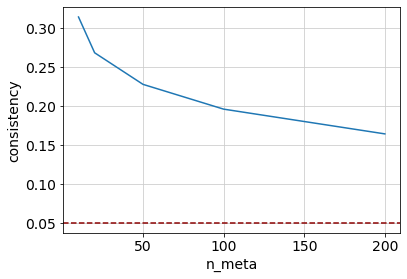

In [40]:
_ = sns.lineplot(x="n_meta", y="consistency", data=dx).axhline(y=0.05, c="darkred", ls="--")

Apply model for cell and feature embedding

In [41]:
rna.obsm["X_glue"] = glue.encode_data("rna", rna)
atac.obsm["X_glue"] = glue.encode_data("atac", atac)

In [42]:
combined = ad.concat([rna, atac])

/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yangchenghui/anaconda3/envs/glue-env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


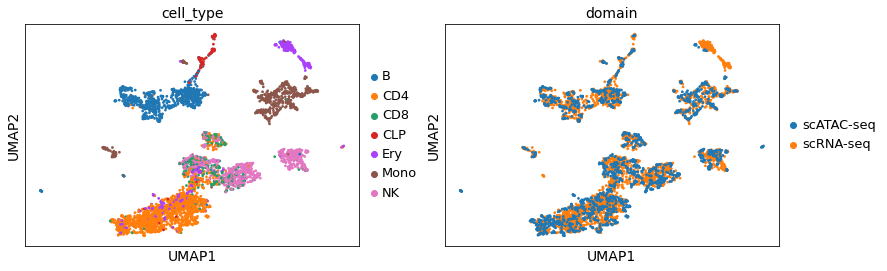

In [43]:
sc.pp.neighbors(combined, use_rep="X_glue", metric="cosine")
sc.tl.umap(combined)
sc.pl.umap(combined, color=["cell_type", "domain"])

In [44]:
combined.write(file_path+"GLUE_result/GLUE-combined.h5ad", compression="gzip")

In [45]:
feature_embeddings = glue.encode_graph(guidance_hvf)
feature_embeddings = pd.DataFrame(feature_embeddings, index=glue.vertices)
feature_embeddings.iloc[:5, :5]


,0,1,2,3,4
A4GALT,-0.239364,0.218440,0.001418,-0.002103,0.000534
AASS,0.414203,0.219760,0.000243,0.000970,-0.005166
ABCB10,-0.171010,-0.009865,-0.000377,0.003140,0.004070
ABCG2,-0.484392,0.188732,0.000485,0.001715,0.004464
ABHD15,0.003661,0.110275,-0.000781,0.000134,-0.000607


In [46]:
rna.varm["X_glue"] = feature_embeddings.reindex(rna.var_names).to_numpy()
atac.varm["X_glue"] = feature_embeddings.reindex(atac.var_names).to_numpy()

In [47]:
rna.write(file_path+"GLUE_result/GLUE-rna-emb.h5ad", compression="gzip")
atac.write(file_path+"GLUE_result/GLUE-atac-emb.h5ad", compression="gzip")
nx.write_graphml(guidance_hvf, file_path+"GLUE_result/GLUE-guidance-hvf.graphml.gz")

calculate cost across modality

In [10]:
import anndata as ad
combined = ad.read(file_path + "GLUE_result/GLUE-combined.h5ad")
combined

/home/yangchenghui/anaconda3/envs/scvi-env/lib/python3.12/site-packages/anndata/__init__.py:52: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 3981 × 0
    obs: 'cell_type', 'domain', 'balancing_weight'
    uns: 'cell_type_colors', 'domain_colors', 'neighbors', 'umap'
    obsm: 'X_glue', 'X_umap'
    obsp: 'connectivities', 'distances'

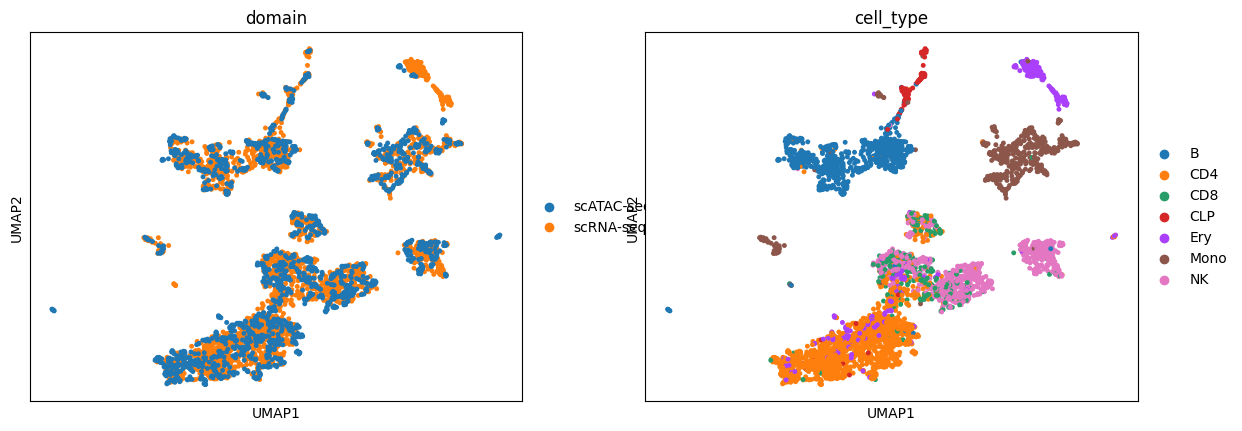

In [12]:
sc.pl.umap(combined, color=["domain", "cell_type"],s = 50, show=False)
pl.savefig(file_path + "pdf/aggBMMC_GLUE_embedding.pdf")

In [ ]:
cell_names1 = combined[combined.obs["domain"] == "scATAC-seq"].obs_names
cell_names1

In [ ]:
cell_names2 = combined[combined.obs["domain"] == "scRNA-seq"].obs_names
cell_names2

In [48]:
rna_emd = combined[combined.obs["domain"] == "scRNA-seq"].obsm["X_glue"]
rna_emd.shape

(2379, 50)

In [49]:
atac_emd = combined[combined.obs["domain"] == "scATAC-seq"].obsm["X_glue"]
atac_emd.shape

(1602, 50)

In [ ]:
basic_labels1 = combined[combined.obs["domain"] == "scATAC-seq"].obs["cell_type"]
basic_labels2 = combined[combined.obs["domain"] == "scRNA-seq"].obs["cell_type"]

计算MNN相似度

In [50]:
import sys
sys.path.insert(1, '/home/nas2/biod/yangchenghui/FGOT-master')
from FGOT import preprocess as pre

In [73]:
S_m = pre.calculate_cell_similarity_byMNN(atac_emd, rna_emd, cell_names1, cell_names2, scale=0, knn = 40)
r = pre.check_mnn_accuracy(S_m, basic_labels1, basic_labels2)
print("The accuracy of identifying MNN pairs is:", r)

the number of MNN pairs is  42580
The accuracy of identifying MNN pairs is: 0.7879019831197421


In [74]:
rows_all_zero = np.all(S_m == 0, axis=1)

# 打印结果
print("是否有全零行:", np.any(rows_all_zero))  # 是否存在全零行
print("全零行的索引:", np.where(rows_all_zero)[0])  # 全零行的索引

是否有全零行: True
全零行的索引: [   9   93  104  119  137  140  146  232  273  284  291  302  321 1321
 1392 1422 1448 1483 1595 1596 1597 1598 1599 1600 1601]


Text(0.5, 1.0, 'S_MNN')

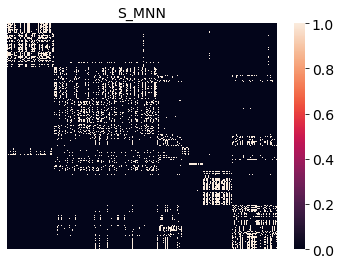

In [67]:
sorted_cols = np.argsort(basic_labels1)
sorted_S = S_m.iloc[sorted_cols,: ]
sorted_rows = np.argsort(basic_labels2)
sorted_S = sorted_S.iloc[:, sorted_rows]
sns.heatmap(sorted_S, xticklabels=False, yticklabels=False)
pl.title('S_MNN')

In [68]:
# import snn
s_tmp = combined.obsp['connectivities'].toarray()
np.fill_diagonal(s_tmp, 1)
snn1 = s_tmp[2379:,2379:]
snn2 = s_tmp[:2379,:2379]

In [69]:
S_sm = pre.smooth_cell_similarity_byLaplacian2(S_m,snn1,snn2)
S = S_sm/np.max(S_sm) + S_m/np.max(S_m)

Text(0.5, 1.0, 'S after smooth')

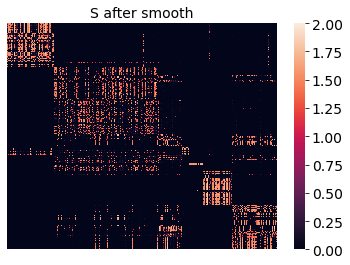

In [70]:
sorted_cols = np.argsort(basic_labels1)
sorted_S = S.iloc[sorted_cols,: ]
sorted_rows = np.argsort(basic_labels2)
sorted_S = sorted_S.iloc[:, sorted_rows]
sns.heatmap(sorted_S, xticklabels=False, yticklabels=False)
pl.title('S after smooth')

In [71]:
# compute cost
cost = np.array(np.exp(np.max(S) - S))
cost = cost - np.min(cost)
cost = pd.DataFrame(cost, index = cell_names1, columns=cell_names2)

Text(0.5, 1.0, 'cost across modality')

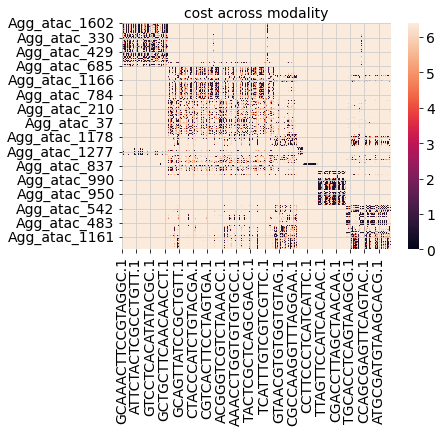

In [72]:
sorted_cols = np.argsort(basic_labels1)
sorted_cost = cost.iloc[sorted_cols,: ]
sorted_rows = np.argsort(basic_labels2)
sorted_cost = sorted_cost.iloc[:, sorted_rows]
sns.heatmap(sorted_cost)
pl.title('cost across modality')